In [1]:
import menpo
import menpofit
import pickle
from pathlib import Path
import gzip

with gzip.open('keypoint_model.pkl.gz') as f:
    bob_model = pickle.load(f)

In [2]:
print(bob_model)

Supervised Descent Method
 - Regression performed using the NonParametricNewton algorithm
   - Regression class: IRLRegression
 - Perturbations generated per shape: 3
 - Images scaled to diagonal: 200.00
 - Custom perturbation scheme used: False
 - Scales: [0.5, 0.5, 1.0, 1.0]
   - Scale 0.5
     - 1 iterations
     - Patch shape: (32, 32)
     - Holistic feature: no_op
     - Patch feature: hellinger_vector_128_dsift
   - Scale 0.5
     - 1 iterations
     - Patch shape: (24, 24)
     - Holistic feature: no_op
     - Patch feature: hellinger_vector_128_dsift
   - Scale 1.0
     - 1 iterations
     - Patch shape: (24, 24)
     - Holistic feature: no_op
     - Patch feature: hellinger_vector_128_dsift
   - Scale 1.0
     - 1 iterations
     - Patch shape: (16, 16)
     - Holistic feature: no_op
     - Patch feature: hellinger_vector_128_dsift



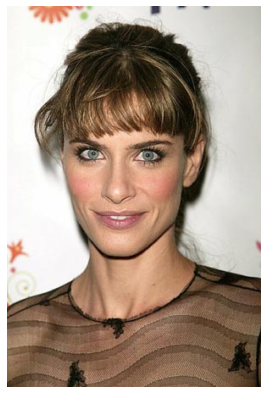

In [5]:
import matplotlib.pyplot as plt
test_img = menpo.io.import_image(Path('./lfpw/trainset/image_0002.png'))
test_img.view()

In [7]:
from menpodetect.dlib.detect import DlibDetector
import dlib
ff_detector = dlib.get_frontal_face_detector()
bboxes = DlibDetector(ff_detector)(test_img, greyscale=True)

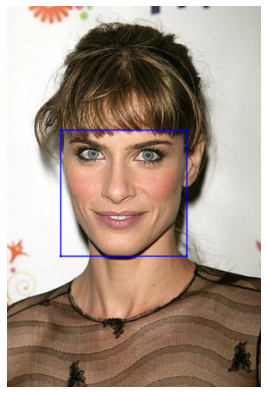

In [8]:
test_img.rasterize_landmarks(group='dlib_0').view()

In [9]:
fr = bob_model.fit_from_bb(test_img, bboxes[0], max_iters=100)

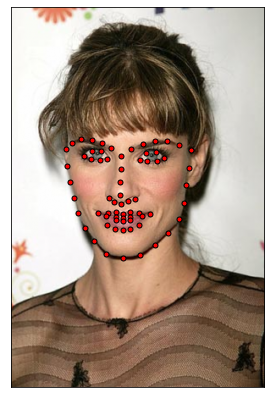

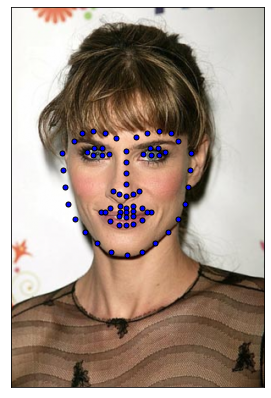

In [11]:
fr.image.view(new_figure=True);
fr.final_shape.view();

fr.image.view(new_figure=True);
fr.initial_shape.view(marker_face_colour='blue');